# Tic Tac Toe. Implementation ofa M.L. algorithm

## Play a game of tic tac toe

In [2]:
import numpy as np
import morpion as mp
morpion = mp.Morpion(dim=2,side=3)

print(morpion.board_as_string())

Using TensorFlow backend.


    +-----------+
0 _ |   |   |   | 
    +-----------+
1 _ |   |   |   | 
    +-----------+
2 _ |   |   |   | 
    +-----------+
      0   1   2 
    next player  : O


In [3]:
morpion.play_random()
print(morpion.board_as_string())

    +-----------+
0 _ |   |   |   | 
    +-----------+
1 _ |   |   | O | 
    +-----------+
2 _ |   |   |   | 
    +-----------+
      0   1   2 
    next player  : X


In [4]:
def game(dim=2,side=3):
    morpion = mp.Morpion(dim=dim,side=side)
    while True:
        morpion.play_random()
        if morpion.is_game_over: break
    return morpion

morpion = game()
print(morpion.board_as_string())

    +-----------+
0 _ | O | O | X | 
    +-----------+
1 _ | X | O | O | 
    +-----------+
2 _ | X | X | X | 
    +-----------+
      0   1   2 
    Game over ! 
X is the winner.


## Let's get the features

When there is a winner, the features shows the state of the board before the last (and winning) move (+1 for the mark of the winner, -1 for the mark of the loser, 0 if the cell is empty).

The label correponds to the cell of the winning move.

In [5]:
import morpionML as mpl 

In [6]:
morpion = game(dim=2,side=3)

print(mpl.get_features_label(morpion))
print(morpion.board_as_string())

(array([[ 0.,  1., -1.,  0.,  1.,  0., -1.,  0.,  0.]]), 7)
    +-----------+
0 _ |   | X | O | 
    +-----------+
1 _ |   | X |   | 
    +-----------+
2 _ | O |   |   | 
    +-----------+
      0   1   2 
    next player  : X


### Run a  simulation to get the learning sample

To get the training set (with m sample), we are going to play m games (with a winner) and get X (of dim=(m,n)) , the features, and y (of dim=(m,1)) the labels.

Let's start with only m=10 sample, in order to see what happens :


In [7]:
X,y = mpl.simulation(side=3,dim=2,m=10)
print(X)
print(y)

[[ 1. -1. -1.  0.  1.  1.  0. -1. -1.]
 [-1.  1. -1. -1.  1. -1.  1.  0.  1.]
 [-1.  0.  1. -1.  0.  0.  1.  0.  0.]
 [ 0.  1. -1. -1. -1.  0.  1.  1.  0.]
 [ 1.  0.  1. -1. -1.  0.  0. -1.  1.]
 [ 1. -1. -1.  1.  0.  1. -1. -1.  1.]
 [-1.  0.  0.  0.  1.  1. -1. -1.  1.]
 [ 1.  1. -1.  0. -1.  1.  1. -1. -1.]
 [-1.  1.  1.  0.  1. -1.  0.  0. -1.]
 [ 1.  0. -1.  0.  0.  1. -1. -1.  1.]]
[[3.]
 [7.]
 [4.]
 [8.]
 [1.]
 [4.]
 [3.]
 [3.]
 [6.]
 [4.]]


### and train our M.L., by using logistic model

In [15]:
import logistic as lg

dim=2
side=3
nb_labels = side**dim

model = lg.Logistic(bias = True,lam = 0,nb_labels = nb_labels)
model.fit(X,y)



In [9]:
X,y = mpl.simulation(side=3,dim=2,m=1000)
model = lg.Logistic(bias = True,lam = 0,nb_labels = nb_labels)
model.fit(X,y)

In [10]:
morpion = game(side=side,dim=dim)
x,y = mpl.get_features_label(morpion)

print(morpion.board_as_string())
probas = np.round(model.predict(x),3)

probas.shape=(3,3)
print(probas)

    +-----------+
0 _ | X |   | O | 
    +-----------+
1 _ | O | O | X | 
    +-----------+
2 _ | X | O | X | 
    +-----------+
      0   1   2 
    next player  : O
[[0.123 0.324 0.019]
 [0.005 0.208 0.139]
 [0.269 0.015 0.092]]


### Learning curve

Now it's time to optimize the learning algorithm. We are going to create a learning curve.

In [11]:
X,y = mpl.simulation(side=3,dim=2,m=10000)
X_val,y_val = mpl.simulation(side=3,dim=2,m=2000)

In [16]:
datas = np.array([])
datas.shape = (5,0)
# first row : i (number of samples)
# second row : loss for the training sample
# third tow  : loss for the validation sample
# row 4      : accuracy (training)
# row 5      : accuracy (validation)

dim=2
side=3
nb_labels = side**dim

model = lg.Logistic(bias = True,lam = 0,nb_labels = nb_labels)


for i in range(200,10000,200):
    X_i = X[1:i,:]
    y_i = y[1:i]
    model.fit(X_i,y_i)
    score_train = model.evaluate(X_i,y_i)
    score_val = model.evaluate(X_val,y_val)
    column = np.array([[i],[score_train[0]],[score_val[0]],[score_train[1]],[score_val[1]]])
    datas = np.hstack((datas,column)) 
    

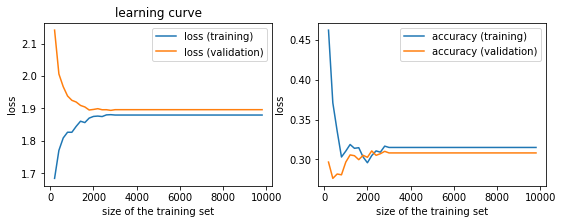

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 3))
plt.subplot(121)
plt.plot(datas[0,:], datas[1,:], label='loss (training)')
plt.plot(datas[0,:], datas[2,:], label='loss (validation)')
plt.xlabel('size of the training set')
plt.ylabel('loss')
plt.legend()
plt.title('learning curve')
plt.subplot(122)
plt.plot(datas[0,:], datas[3,:], label='accuracy (training)')
plt.plot(datas[0,:], datas[4,:], label='accuracy (validation)')
plt.xlabel('size of the training set')
plt.ylabel('loss')
plt.legend()
plt.show()



Conclusion : 
* For a sample of 10 000, we can see that losses for the validation and the trainig samples are very close to each other. It seems that the algorithm has learned what it can. No need to train it more.
* The accuracy is too low, around 30% execpt if the size of the training sample is very small (less than 100). The algorithm is clearly underfitting.

Logistic regression doesn't seem to be appropriate. It could be possible to improve it by adding new features (polynomial features...). We are also going to implement a deep learning algorithm with keras.

But to start, let's use logistic regression model with a sample of 3000.

You can play agains this AI and see how ot performs :
http://mapariel.pythonanywhere.com/tictactoe/

In [14]:
X = X[1:3000,:]
y = y[1:3000]
model.fit(X,y)
model.save('logistic_3_2.csv')